# Credit Card Fraud Detection

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv('creditcard.csv')
# Converting all column names to lower case
df.columns = df.columns.str.lower()
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.shape

(284807, 31)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

In [14]:
df.isnull().sum().sum()

np.int64(0)

In [15]:
df['class'].value_counts()/len(df)

class
0    0.998273
1    0.001727
Name: count, dtype: float64

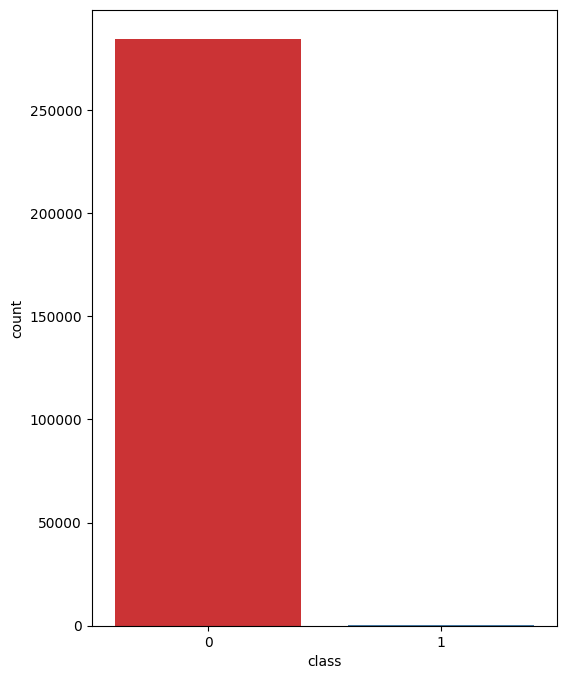

In [16]:
f,ax = plt.subplots(figsize=(6,8))
ax = sns.countplot(x='class', data=df, palette='Set1')
plt.show()

In [17]:
df[['time','amount']].describe()

,time,amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [18]:
fraud = df[df['class']==1]
normal = df[df['class']==0]
print(f'Shape of Fraud Transactions: {fraud.shape}')
print(f'Shape of Normal Transactions: {normal.shape}')

Shape of Fraud Transactions: (492, 31)
Shape of Normal Transactions: (284315, 31)


In [19]:
pd.concat([fraud['amount'].describe(), normal['amount'].describe()], axis=1)

,amount,amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [20]:
fraud['amount'].value_counts().head()

amount
1.00     113
99.99     27
0.00      27
0.76      17
0.77      10
Name: count, dtype: int64

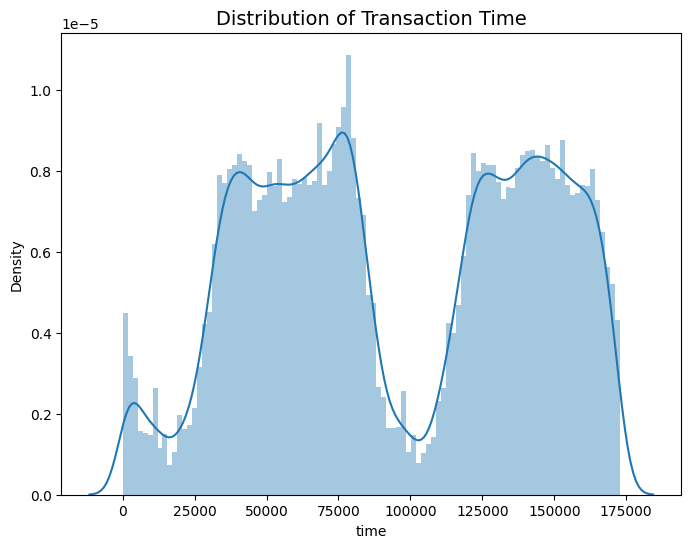

In [21]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(df['time'], bins=100)
plt.show()

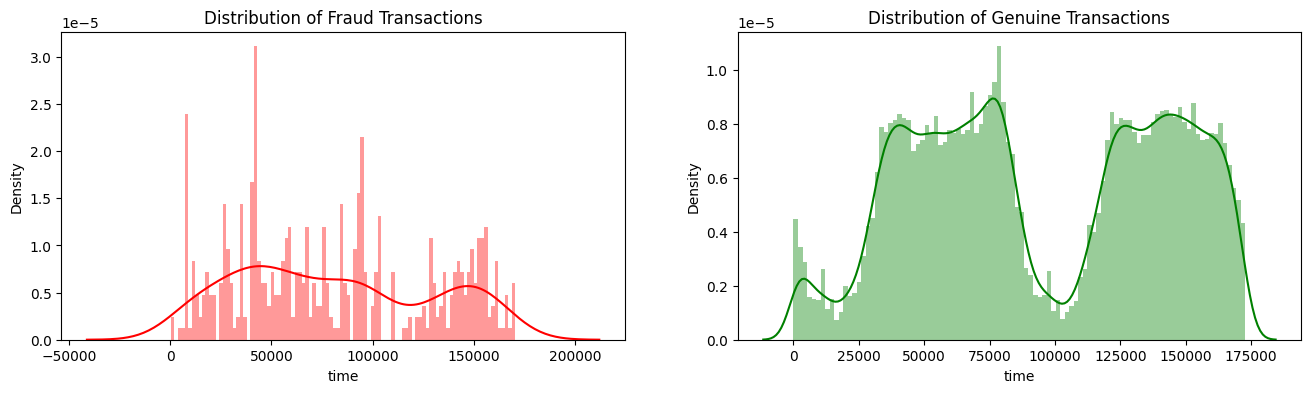

In [22]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(fraud['time'], bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(normal['time'], bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

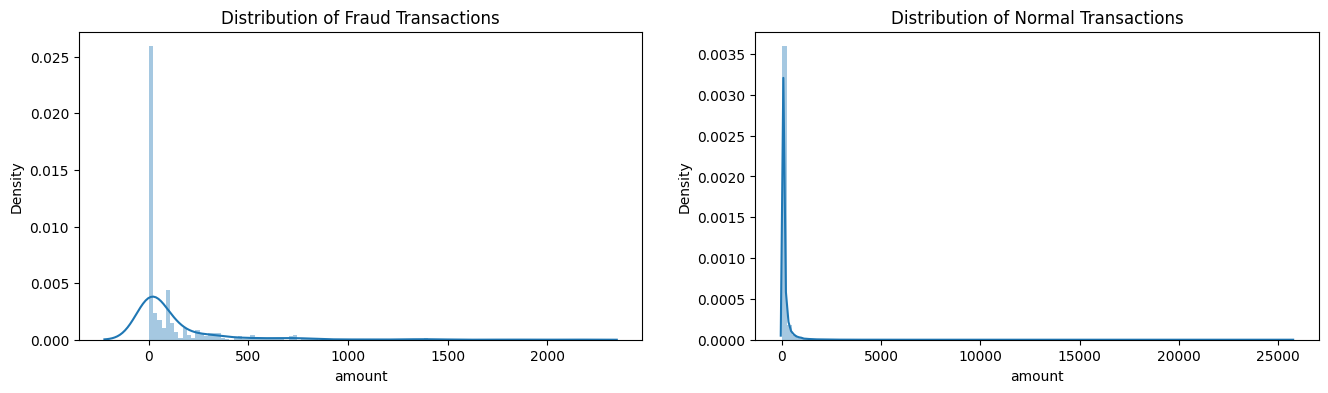

In [23]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(fraud['amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(normal['amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Normal Transactions")

plt.show()

In [24]:
# Scale amount by log
df['amount_log'] = np.log(df.amount + 0.0001)
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v22,v23,v24,v25,v26,v27,v28,amount,class,amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.008099
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.989578
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.936639
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.816242
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.248354


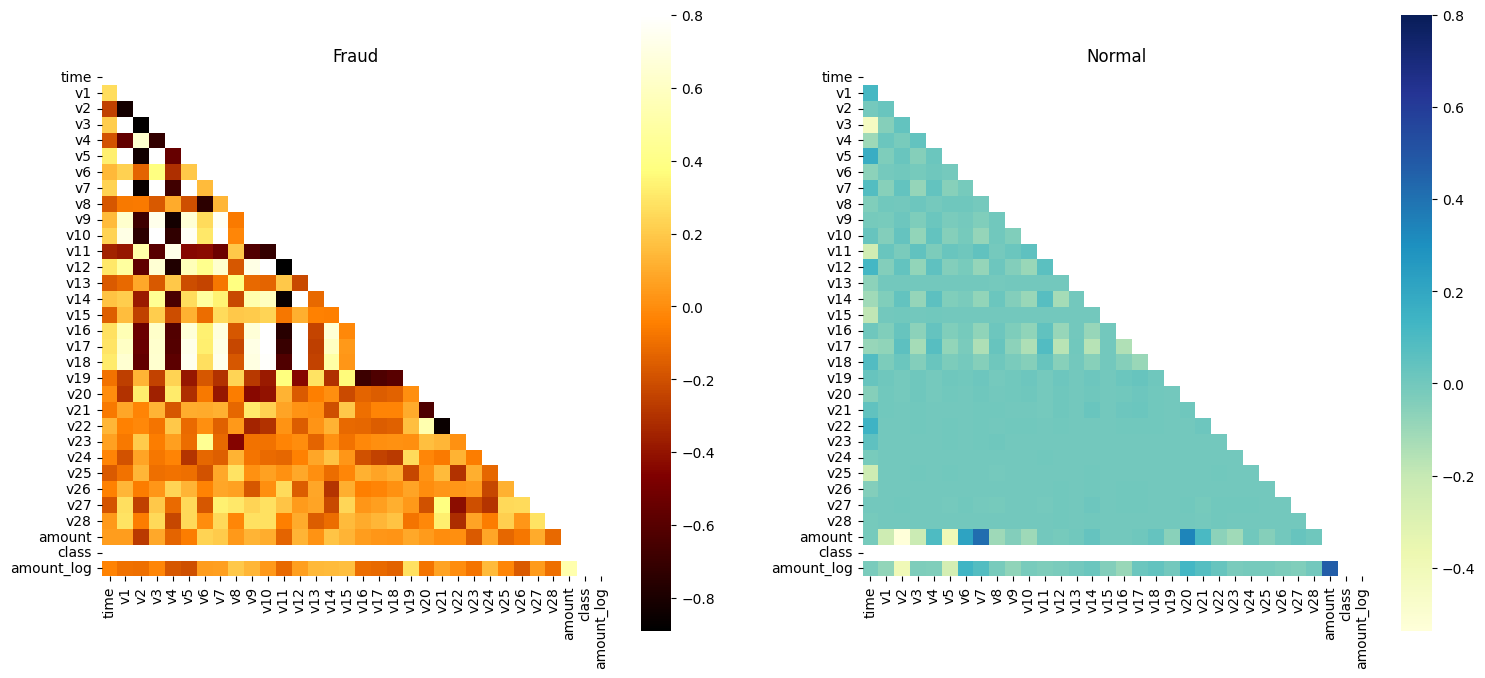

In [25]:
# Correlation matrix 
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 18, 8))
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap((df.loc[df['class'] ==1]).corr(), vmax = .8, square=True, ax = ax1, cmap = 'afmhot', mask=mask);
ax1.set_title('Fraud')
sns.heatmap((df.loc[df['class'] ==0]).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu', mask=mask);
ax2.set_title('Normal')
plt.show()

In [26]:
X = df.drop(['class','time'], axis=1)

y = df['class']

In [27]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape

((227845, 30), (56962, 30))

In [28]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

## SMOTE

In [29]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(y_train))

smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smt))

Original dataset shape Counter({0: 227454, 1: 391})
Resampled dataset shape Counter({0: 227454, 1: 227454})


In [30]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [31]:
import time
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, roc_curve, classification_report, ConfusionMatrixDisplay)

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    #print("Precision  = {}".format(precision))
    #print("Recall  = {}".format(recall))
    print("F1 Score  = {}".format(f1))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()

    
    return model, accuracy, roc_auc, f1, coh_kap, time_taken

## Logistic Regression

Accuracy = 0.9757733225659211
ROC Area under Curve = 0.958214934769712
F1 Score  = 0.12101910828025478
Cohen's Kappa = 0.1180928601987834
Time taken = 45.968682289123535
              precision    recall  f1-score   support

           0    0.99989   0.97584   0.98772     56861
           1    0.06467   0.94059   0.12102       101

    accuracy                        0.97577     56962
   macro avg    0.53228   0.95821   0.55437     56962
weighted avg    0.99823   0.97577   0.98618     56962



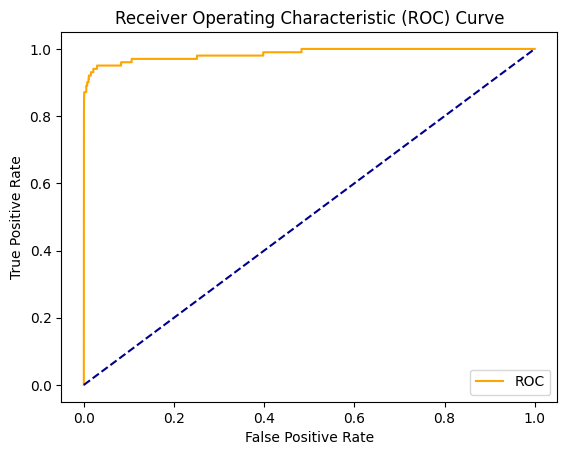

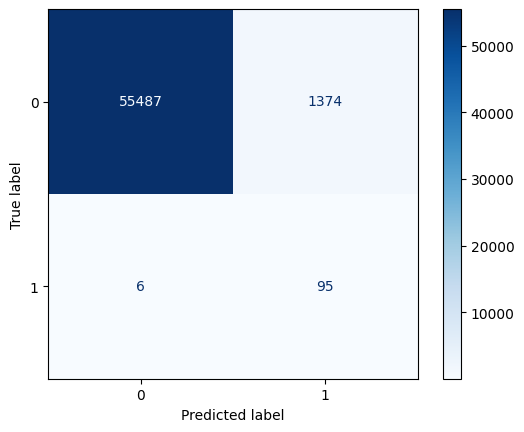

In [32]:
# Logistic Regression with SMOTE
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lrsmt = LogisticRegression(**params_lr)
model_lrsmt, accuracy_lrsmt, roc_auc_lrsmt,f1_score_lrsmt,coh_kap_lrsmt, tt_lrsmt = run_model(model_lrsmt, X_train_smt, y_train_smt, X_test, y_test)

## Decision Tree

Accuracy = 0.9912222183209859
ROC Area under Curve = 0.891827578143052
F1 Score  = 0.24242424242424243
Cohen's Kappa = 0.24014197534059134
Time taken = 4.534406661987305
              precision    recall  f1-score   support

           0    0.99963   0.99158   0.99559     56861
           1    0.14311   0.79208   0.24242       101

    accuracy                        0.99122     56962
   macro avg    0.57137   0.89183   0.61900     56962
weighted avg    0.99811   0.99122   0.99425     56962



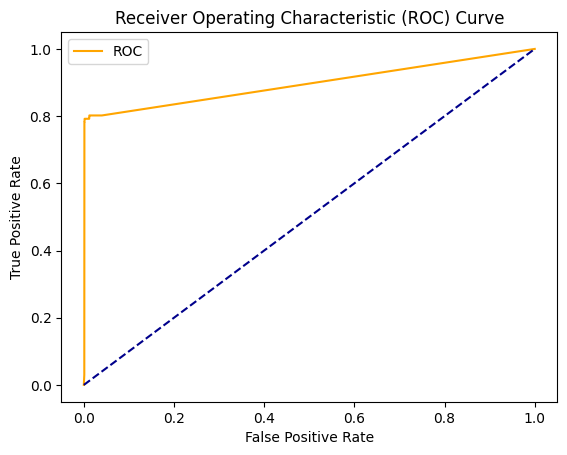

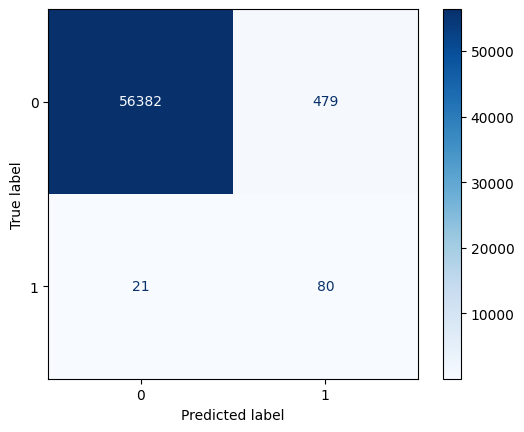

In [29]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dtsmt = DecisionTreeClassifier(**params_dt)
model_dtsmt, accuracy_dtsmt, roc_auc_dtsmt, f1_score_dtsmt,coh_kap_dtsmt, tt_dtsmt = run_model(model_dtsmt, X_train_smt, y_train_smt, X_test, y_test)

## Random Forest

Accuracy = 0.9994908886626171
ROC Area under Curve = 0.9256194670310315
F1 Score  = 0.8557213930348259
Cohen's Kappa = 0.8554663937741017
Time taken = 789.278576374054
              precision    recall  f1-score   support

           0    0.99974   0.99975   0.99974     56861
           1    0.86000   0.85149   0.85572       101

    accuracy                        0.99949     56962
   macro avg    0.92987   0.92562   0.92773     56962
weighted avg    0.99949   0.99949   0.99949     56962



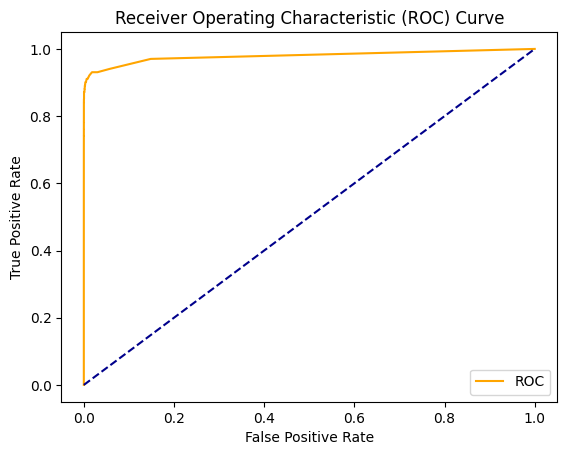

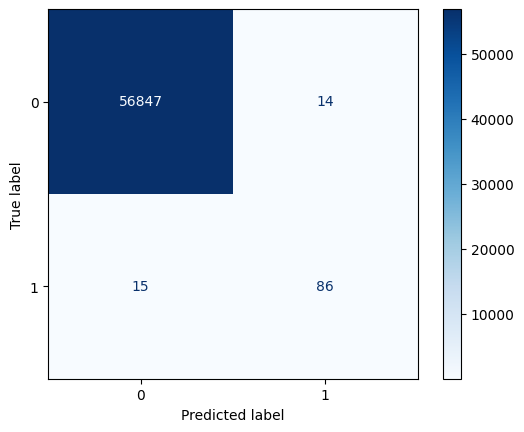

In [33]:
# Random Forest with SMOTE
from sklearn.ensemble import RandomForestClassifier

model_rfsmt = RandomForestClassifier()
model_rfsmt, accuracy_rfsmt, roc_auc_rfsmt, f1_score_rfsmt,coh_kap_rfsmt, tt_rfsmt = run_model(model_rfsmt, X_train_smt, y_train_smt, X_test, y_test)

## LightBGM

[LightGBM] [Info] Number of positive: 227454, number of negative: 227454
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.173737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454908, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy = 0.9987886661282961
ROC Area under Curve = 0.9252677320984767
F1 Score  = 0.7136929460580913
Cohen's Kappa = 0.7131019225286181
Time taken = 10.986251592636108
              precision    recall  f1-score   support

           0    0.99974   0.99905   0.99939     56861
           1    0.61429   0.85149   0.71369       101

    accuracy                        0.99879     56962
   macro avg    0.80701   0.92527   0.85654     56962
weighted avg    0.99905   0.99879   0.99889     56962



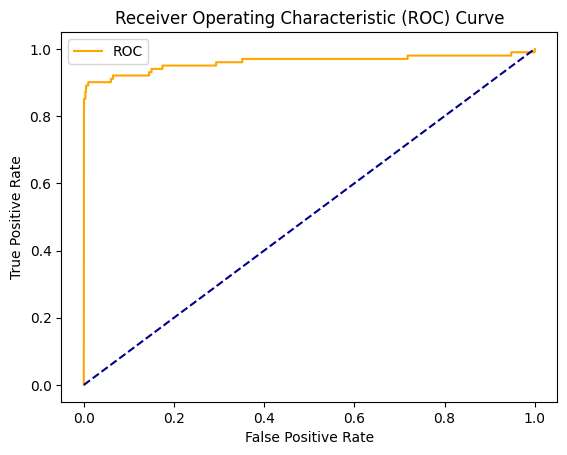

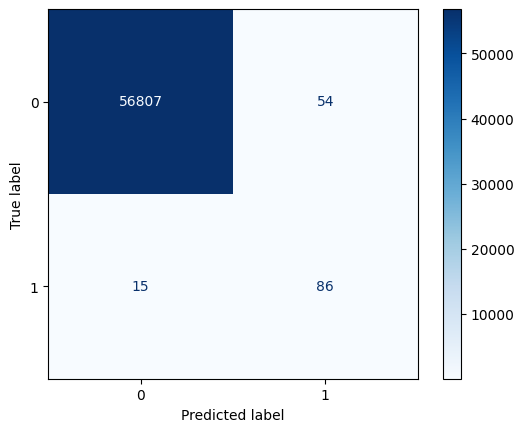

In [39]:
# Light GBM with SMOTE
import lightgbm as lgb

model_lgbsmt = lgb.LGBMClassifier()
model_lgbsmt, accuracy_lgbsmt, roc_auc_lgbsmt, f1_score_lgbsmt,coh_kap_lgbsmt, tt_lgbsmt = run_model(model_lgbsmt, X_train_smt, y_train_smt, X_test, y_test)

### Catboost

Learning rate set to 0.5
0:	learn: 0.0939013	total: 28.3s	remaining: 8m 56s
1:	learn: 0.0369056	total: 53.3s	remaining: 7m 59s
2:	learn: 0.0199681	total: 1m 18s	remaining: 7m 22s
3:	learn: 0.0125477	total: 1m 41s	remaining: 6m 46s
4:	learn: 0.0086886	total: 2m 4s	remaining: 6m 14s
5:	learn: 0.0059908	total: 2m 28s	remaining: 5m 47s
6:	learn: 0.0042265	total: 2m 52s	remaining: 5m 19s
7:	learn: 0.0034405	total: 3m 15s	remaining: 4m 53s
8:	learn: 0.0028327	total: 3m 39s	remaining: 4m 28s
9:	learn: 0.0023883	total: 4m 4s	remaining: 4m 4s
10:	learn: 0.0021404	total: 4m 26s	remaining: 3m 38s
11:	learn: 0.0018040	total: 4m 50s	remaining: 3m 13s
12:	learn: 0.0015751	total: 5m 15s	remaining: 2m 49s
13:	learn: 0.0012856	total: 5m 36s	remaining: 2m 24s
14:	learn: 0.0011690	total: 5m 58s	remaining: 1m 59s
15:	learn: 0.0010272	total: 6m 21s	remaining: 1m 35s
16:	learn: 0.0009326	total: 6m 43s	remaining: 1m 11s
17:	learn: 0.0008497	total: 7m 6s	remaining: 47.4s
18:	learn: 0.0007541	total: 7m 29s	rem

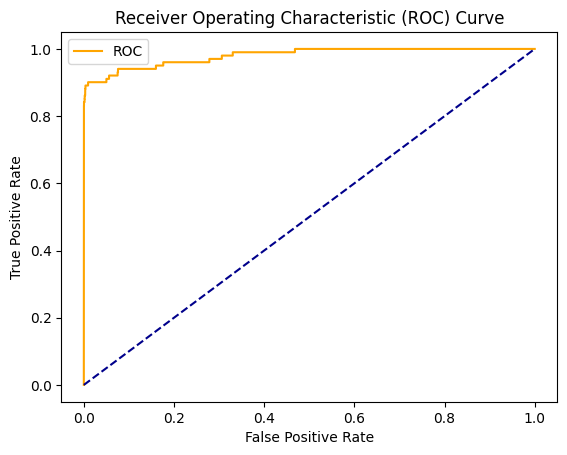

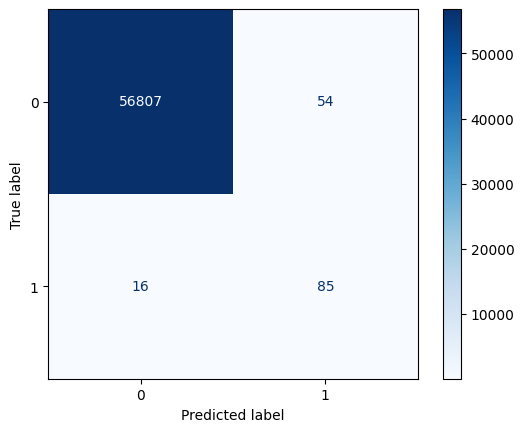

In [34]:
# Catboost
import catboost as cb
params_cb ={'iterations': 20,
            'max_depth': 16}

model_cbsmt = cb.CatBoostClassifier(**params_cb)
model_cbsmt, accuracy_cbsmt, roc_auc_cbsmt, f1_score_cbsmt,coh_kap_cbsmt, tt_cbsmt = run_model(model_cbsmt, X_train_smt, y_train_smt, X_test, y_test)

### XGBoost

Accuracy = 0.9992451107756047
ROC Area under Curve = 0.9205546581284463
F1 Score  = 0.7981220657276995
Cohen's Kappa = 0.7977449245195116
Time taken = 8.957394361495972
              precision    recall  f1-score   support

           0    0.99972   0.99953   0.99962     56861
           1    0.75893   0.84158   0.79812       101

    accuracy                        0.99925     56962
   macro avg    0.87932   0.92055   0.89887     56962
weighted avg    0.99929   0.99925   0.99926     56962



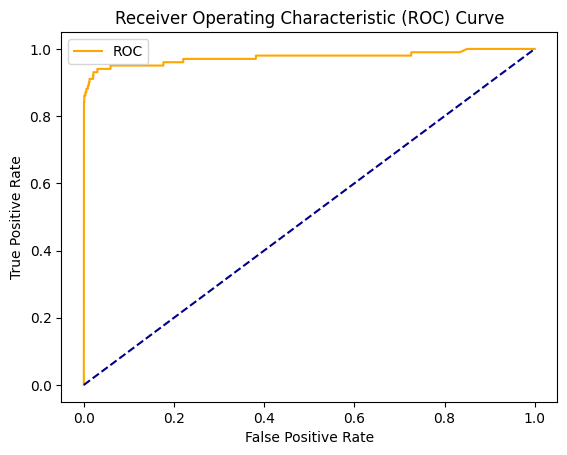

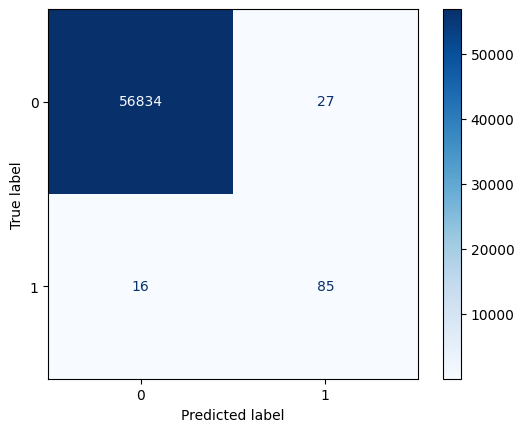

In [35]:
# XGBoost with SMOTE
import xgboost as xgb
params_xgb ={'n_estimators': 20,
            'max_depth': 16}

model_xgbsmt = xgb.XGBClassifier(**params_xgb)
model_xgbsmt, accuracy_xgbsmt, roc_auc_xgbsmt, f1_score_xgbsmt,coh_kap_xgbsmt, tt_xgbsmt = run_model(model_xgbsmt, X_train_smt, y_train_smt, X_test, y_test)

In [45]:
# Collect results into a dataframe
results = {
    "Logistic Regression": [accuracy_lrsmt, roc_auc_lrsmt, f1_score_lrsmt, coh_kap_lrsmt],
    "Random Forest": [accuracy_rfsmt, roc_auc_rfsmt, f1_score_rfsmt, coh_kap_rfsmt],
    "LightGBM": [accuracy_lgbsmt, roc_auc_lgbsmt, f1_score_lgbsmt, coh_kap_lgbsmt],
    "CatBoost": [accuracy_cbsmt, roc_auc_cbsmt, f1_score_cbsmt, coh_kap_cbsmt],
    "XGBoost": [accuracy_xgbsmt, roc_auc_xgbsmt, f1_score_xgbsmt, coh_kap_xgbsmt]
    
}

df_results = pd.DataFrame(results, index=["Accuracy","ROC-AUC","F1","CohenKappa"]).T
df_results


,Accuracy,ROC-AUC,F1,CohenKappa
Logistic Regression,0.975773,0.958215,0.121019,0.118093
Random Forest,0.999491,0.925619,0.855721,0.855466
LightGBM,0.998789,0.925268,0.713693,0.713102
CatBoost,0.998771,0.920317,0.708333,0.707733
XGBoost,0.999245,0.920555,0.798122,0.797745


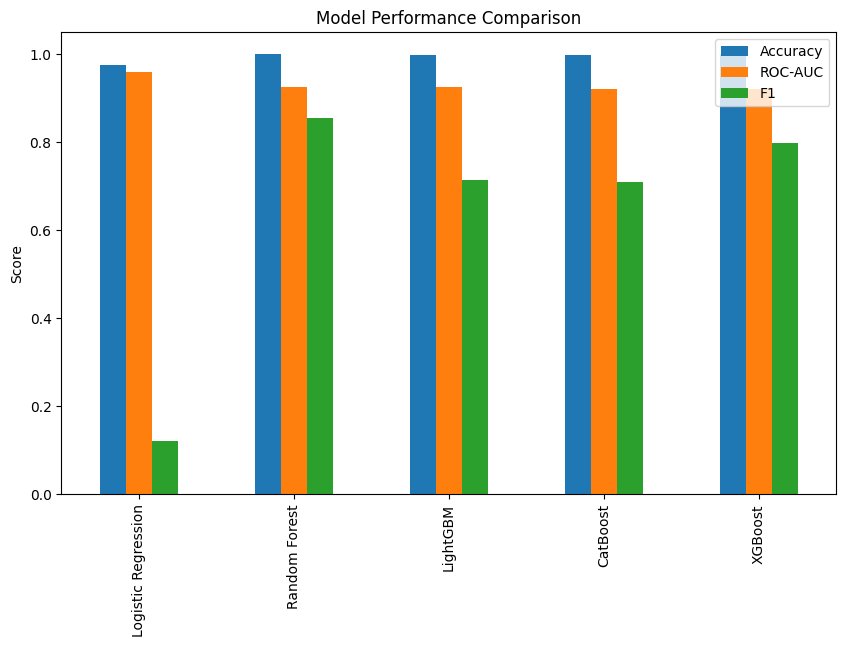

In [46]:
# Bar plot for visual comparison
df_results[["Accuracy","ROC-AUC","F1"]].plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()


[LightGBM] [Info] Number of positive: 227454, number of negative: 227454
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.174776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454908, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy = 0.9992977774656788
ROC Area under Curve = 0.9255227399245789
F1 Score  = 0.8113207547169812
Cohen's Kappa = 0.8109697729841949
Time taken = 780.6452553272247
              precision    recall  f1-score   support

           0    0.99974   0.99956   0.99965     56861
           1    0.77477   0.85149   0.81132       101

    accuracy                        0.99930     56962
   macro avg    0.88726   0.92552   0.90548     56962
weighted avg    0.99934   0.99930   0.99931     56962



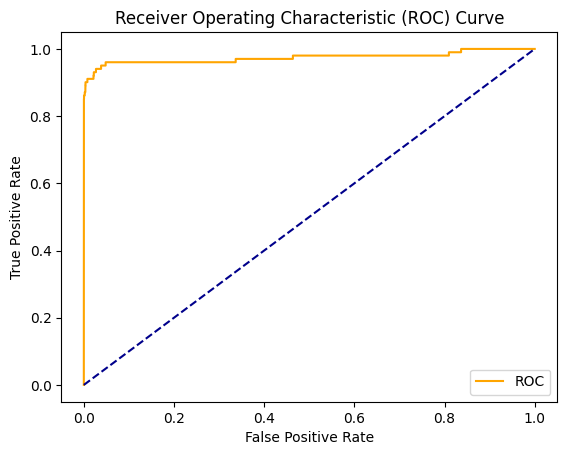

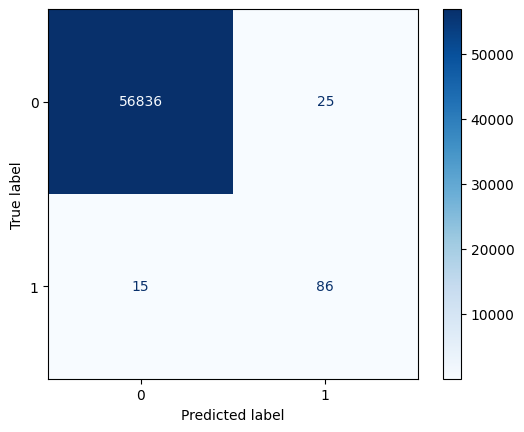

In [42]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('rf', model_rfsmt),
        ('lgbm', model_lgbsmt),
        ('xgb', model_xgbsmt)
    ],
    voting='soft'
)

voting_clf, acc_vot, roc_auc_vot, f1_vot, coh_kap_vot, tt_vot = run_model(
    voting_clf, X_train_smt, y_train_smt, X_test, y_test
)


In [47]:
import joblib

# Save Random Forest as best model
joblib.dump(model_rfsmt, "best_fraud_model.pkl")

print("Best model (Random Forest) saved successfully as best_fraud_model.pkl")


Best model (Random Forest) saved successfully as best_fraud_model.pkl


In [48]:
# ------------------------------------------------------------
# Final Conclusion
# ------------------------------------------------------------
# After training and evaluating multiple models (Logistic Regression,
# Random Forest, LightGBM, CatBoost, XGBoost) with SMOTE balancing,
# Random Forest achieved the best performance with:
# - Highest F1-score (≈0.856)
# - Strong Recall (fraud detection rate)
# - Best Cohen’s Kappa agreement score
#
# Therefore, Random Forest is chosen as the final best model for
# fraud detection, and has been saved as "best_fraud_model.pkl".
# ------------------------------------------------------------
